# Numpy


### Wy Numpy?

1. You can plot the logo:

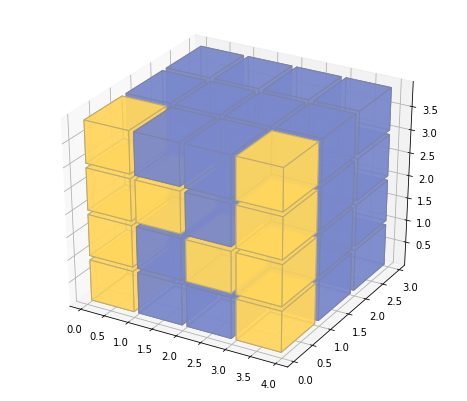

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

fig = plt.figure(figsize=(8,7))
ax = fig.gca(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
plt.show()

NumPy is the fundamental package needed for scientific computing with Python.

It provides:

+ a powerful N-dimensional array object
+ sophisticated (broadcasting) functions
+ tools for integrating C/C++ and Fortran code
+ useful linear algebra, Fourier transform, and random number capabilities


In [4]:
[x**2 for x in range(int(10))]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [5]:
np.arange(10)**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

+ it is _fast_:

In [6]:
%timeit [x**2 for x in range(int(10e6))]

6.55 s ± 455 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit np.arange(10e6)**2

89.5 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


What makes numpy so fast?

_The data structure!_

a Numpy array is a sequence of elements that are contiguos in the memory space!

## Dot product in pure Python vs Numpy 

The dot product of two vectors **a** = [a1, a2, ..., an] and **b** = [b1, b2, ..., bn] is defined as:
$$ \mathbf{a} \cdot \mathbf {b} =\sum _{i=1}^{n}a_{i}b_{i}=a_{1}b_{1}+a_{2}b_{2}+\cdots +a_{n}b_{n} $$

In [103]:
# let's define some vectors [0,1,2...n]
n = 100000

# vectors as python lists
vec1 = list(range(n))
vec2 = list(range(n))

# vectors as numpy arrays
arr1 = np.arange(n)
arr2 = np.arange(n)

assert arr1.tolist() == vec1
assert arr2.tolist() == vec2

In [98]:
# Pure python implementation of dot product
def dot_product(v1, v2):
    
    assert len(v1) == len(v2)
    result = 0
    for i in  range(len(v1)):
        result += v1[i] * v2[i]
        
    return result

In [99]:
dot_product(vec1, vec2) == np.dot(arr1, arr2)

False

_- Wait? what??_

In [100]:
dot_product(vec1, vec2) == np.dot(arr1, arr2)

False

I think we implemented `dot_product` correctly 🤔

why are the results diferent?

In [101]:
python_result = dot_product(vec1, vec2)
python_result

333328333350000

In [102]:
numpy_result = np.dot(arr1, arr2)
numpy_result

216474736

The problem is that the elements of `arr1` and `arr2` are [`int32`, 32 bits integers](https://docs.scipy.org/doc/numpy/user/basics.types.html)!


In [105]:
arr1.dtype

dtype('int32')

the max number that can be represented with 32 bits is $2^{32}$:

-2147483648 to 2147483647 !

if we use `int64` the problem will be solved